## Supplement 3: Regression

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

### 3.2 Programming Task: Gradient Descent
Consider the function $J(\boldsymbol{w})=J(w_0, w_1) =-e^{-\frac{1}{100}(w_1^2 + w_2^2 -w_1w_2 - 2w_1  + 4w_2 + 5)} - 2 e^{-(w_1^2  + w_2^2  - 4w_1- 9 w_2 + 25)}.$

i\. Plot $J(\boldsymbol{w})$ as a function of $\boldsymbol{w}$ using the contour plot using the Matplotlib module. 

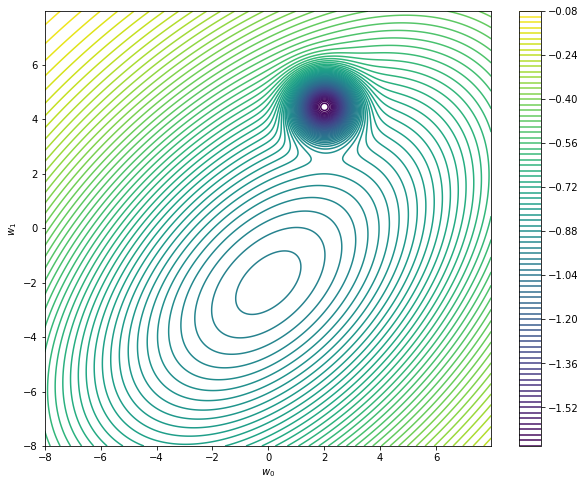

In [2]:
# TODO: Define function J(w)
def J_w(weights):
    w0 = weights[0]
    w1 = weights[1]

    exp1 = -1 * np.exp(-0.01 * (w0**2 + w1**2 - w0*w1 - 2*w0 + 4*w1 + 5))
    exp2 = -2 * np.exp(-1  * (w0**2 + w1**2 - 4*w0 - 9*w1 + 25))

    return exp1 + exp2

# TODO: Prepare contours plot of J(w)
step = 0.025
max_value = 8
x = np.arange(-max_value, max_value, step)
y = np.arange(-max_value, max_value, step)
X, Y = np.meshgrid(x, y)
J = J_w(np.array([X, Y]))

plt.figure(figsize=(10,8))
contour_plot = plt.contour(X, Y, J, levels=100)
plt.xlabel(r'$w_0$')
plt.ylabel(r'$w_1$')

plt.colorbar(contour_plot)
plt.show()

ii\. Obtain the gradient of the above function by hand.
            
  $Hint:   \nabla J(\boldsymbol{w}) = \left(
  \begin{array}{c}
    \frac{\partial J(\boldsymbol{w})}{\partial w_1} \\ %
    \frac{\partial J(\boldsymbol{w})}{\partial w_2}
  \end{array} \right)
$

iii\. Implement gradient descent algorithm described in the lecture to find the minimum of this
            function using the NumPy module. Plot the location of the new $\boldsymbol{w}$ after each iteration on the contour plot.

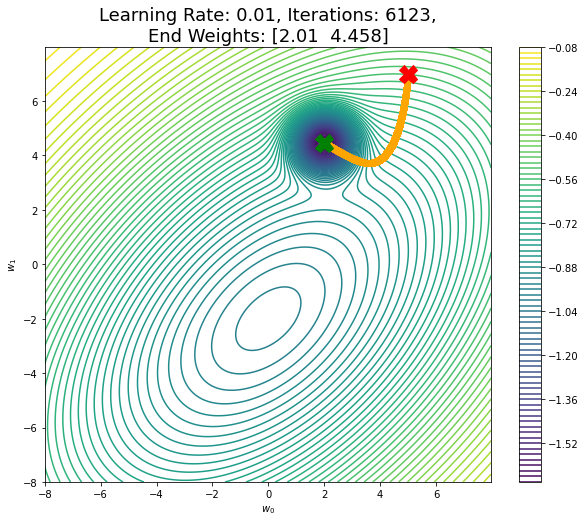

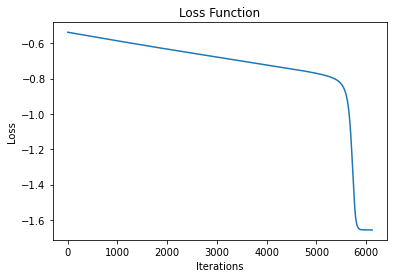

In [3]:
# TODO: Define function gradient_J(w)
def gradient_J(w):
    w0 = w[0]
    w1 = w[1]

    deriv_exp1_w0 = (-0.01 * (2*w0 - w1 - 2)) * -np.exp(-0.01 * (w0**2 + w1**2 - w0*w1 - 2*w0 + 4*w1 + 5))
    deriv_exp1_w1 = (-0.01 * (2*w1 - w0 + 4)) * -np.exp(-0.01 * (w0**2 + w1**2 - w0*w1 - 2*w0 + 4*w1 + 5))

    deriv_exp2_w0 = (-1 * (2*w0 - 4)) * -2 * np.exp(-(w0**2 + w1**2 - 4*w0 - 9*w1 + 25))
    deriv_exp2_w1 = (-1 * (2*w1 - 9)) * -2 * np.exp(-(w0**2 + w1**2 - 4*w0 - 9*w1 + 25))

    gradient_w0 = deriv_exp1_w0 + deriv_exp2_w0
    gradient_w1 = deriv_exp1_w1 + deriv_exp2_w1

    return np.array([gradient_w0, gradient_w1])

# TODO: Define the gradient descent algorithm as function
def gradientDescent(function, gradient_function, initial, learning_rate=0.01, tolerance=1e-3, iterations=10000):
    weights = np.array(initial)
    weights_history = [initial]

    losses = []
    current_iteration = 0
    for current_iteration in range(iterations):
        gradient = gradient_function(weights)
        weights = weights - learning_rate * gradient
        weights_history.append(weights)
        losses.append(function(weights))

        # Stop if the norm of the gradients is smaller than tolerance
        if np.linalg.norm(gradient) < tolerance:
            break

    return weights, np.array(weights_history), current_iteration+1, np.array(losses)

# TODO: Train weights
learning_rate = 0.01
initial_weights = [5, 7]
weights, weights_history, iterations, losses = gradientDescent(J_w, gradient_J, initial_weights, learning_rate)

# TODO: Prepare contour plot and mark each weight update on the plot.
plt.figure(figsize=(10,8))
contour_plot = plt.contour(X, Y, J, levels=100)
plt.xlabel(r'$w_0$')
plt.ylabel(r'$w_1$')

plt.plot(weights_history[0,0], weights_history[0,1], marker='X', markersize=18, zorder=3, color='red')
plt.plot(weights_history[1:-2,0], weights_history[1:-2,1], marker='o', zorder=2, color='orange')
plt.plot(weights_history[-1,0], weights_history[-1,1], marker='X', markersize=18, zorder=3, color='green')

plt.title('Learning Rate: ' + str(learning_rate) + ', Iterations: ' + str(iterations+1) +
          ',\nEnd Weights: ' + str(np.round(weights,3)), size=18)
plt.colorbar(contour_plot)
plt.show()

# Plot of the loss function
fig, ax = plt.subplots(1,1)
ax.plot(np.arange(1, iterations+1, 1), losses)
ax.set_title('Loss Function')
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
plt.show()

### 3.3 Programming Task: Housing Price Regression Problem
The file __house\_prices.txt__ contains a data set of house prices: the
first column is the house size in square feet, the second column is the number
of bedrooms, the third column is the price in USD.


i\. Plot house prices vs. house sizes as a scatter plot.

Text(0, 0.5, 'House Prizes [USD]')

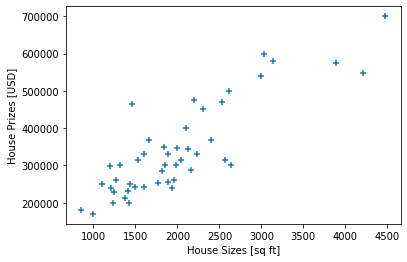

In [4]:
# TODO: Read and prepare scatter plot
data = np.genfromtxt('house_prices.txt', dtype=int, delimiter=',', skip_header=0, skip_footer=0)
house_sizes = data[:,0]
bedrooms = data[:,1]
house_prices = data[:,2]

plt.scatter(x=house_sizes, y=house_prices, marker='+')
plt.xlabel('House Sizes [sq ft]')
plt.ylabel('House Prizes [USD]')

ii\. Next, fit the linear regression to these data points. You should not use
    any other python module besides NumPy to find the weights of the model.

* Consider the linear model $h_{\boldsymbol{w}}(\boldsymbol{x})=w_0 x_0 + w_1 x_1={\boldsymbol{w}}^\top\boldsymbol{x}$, where $x_1$ is the house size in the first column of __house\_prices.txt__, $x_0=1$ by convention, $\boldsymbol{x}={[x_0,x_1]}^\top$ and $\boldsymbol{w}={[w_0, w_1]}^\top$. Define the cost function on the dataset:
 
    $J(\boldsymbol{w})=\frac{1}{2}\sum_{i=1}^{n} \left(h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})-y^{(i)}\right)^2.$

 
    Above, $n$ is the number of rows in __house_prices.txt__, $y^{(i)}$ is the house price given in the third column of the file, $\boldsymbol{x}^{(i)} = {[1\ x_1^{(i)}]}$ and $x_1^{(i)}$ is the house size from the first column and $i$th row of the file. $h_{\boldsymbol{w}}(\cdot)$ represents the linear regression model. Plot $J(\boldsymbol{w})$ as a function of $\boldsymbol{w}$ using the contour plot. You may rescale the data if required.

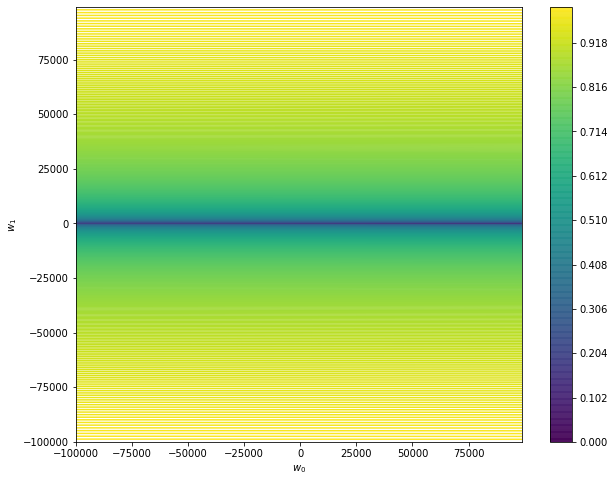

In [5]:
# TODO: Define function J(w)
def J_house(weights):
    w0 = weights[0]
    w1 = weights[1]

    cost = 0
    for i in range(len(house_sizes)):
        cost += (w0*1 + w1*house_sizes[i] - house_prices[i])**2

    return 0.5 * cost

# TODO: Define function gradient_J(w)
def gradient_J_house(w):
    w0 = w[0]
    w1 = w[1]

    gradient_w0 = 0
    gradient_w1 = 0

    for i in range(len(house_sizes)):
        gradient_w0 += (w0*1 + w1*house_sizes[i] - house_prices[i]) * 1
        gradient_w1 += (w0*1 + w1*house_sizes[i] - house_prices[i]) * house_sizes[i]

    return np.array([gradient_w0, gradient_w1])

# TODO: Plot the cost function
step = 1000
max_value = 100000
w0 = np.arange(-max_value, max_value, step)
w1 = np.arange(-max_value, max_value, step)
X, Y = np.meshgrid(w0, w1)
J = J_house(np.array([X, Y]))

plt.figure(figsize=(10,8))
norm=colors.LogNorm()
# norm=colors.Normalize()
contour_plot = plt.contour(X, Y, norm(J), levels=512)
plt.xlabel(r'$w_0$')
plt.ylabel(r'$w_1$')

plt.colorbar(contour_plot)
plt.show()

* Start with some initial value $\boldsymbol{w}$
and run the steps of the gradient descent algorithm (you may reuse revelant
parts of the solution from task 3.2). Plot the location of each new $\boldsymbol{w}$ on
the contour plot similar to the previous task.

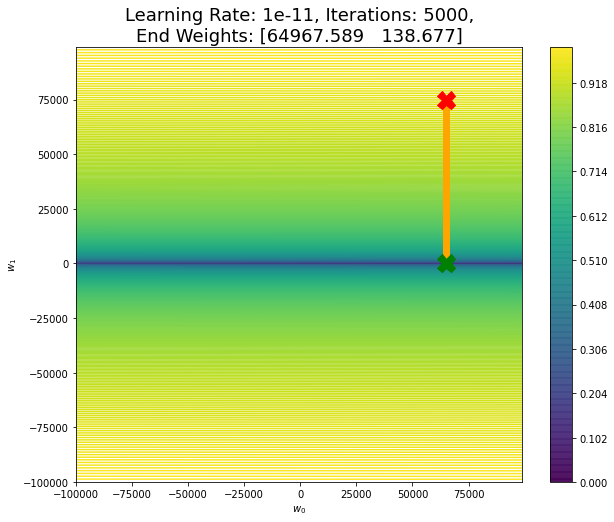

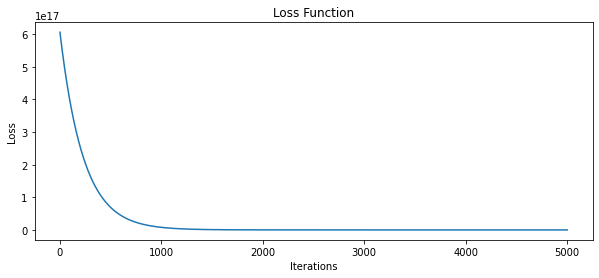

In [6]:
# TODO: Train w
# Store each update of w in an array to make plot later
initial_weights = [65000, 75000]
learning_rate = 1e-11
tolerance = 1e-3
max_Iter = 5000
weights, weights_history, iterations, house_losses = gradientDescent(J_house, gradient_J_house, initial_weights,
                                                                     learning_rate, tolerance, max_Iter)

# TODO: Prepare contour plot and mark each weight update on the plot
step = 1000
max_value = 100000
w0 = np.arange(-max_value, max_value, step)
w1 = np.arange(-max_value, max_value, step)
X, Y = np.meshgrid(w0, w1)
J = J_house(np.array([X, Y]))

plt.figure(figsize=(10,8))
norm=colors.LogNorm()
# norm=colors.Normalize()
contour_plot = plt.contour(X, Y, norm(J), levels=512)
plt.xlabel(r'$w_0$')
plt.ylabel(r'$w_1$')

plt.plot(weights_history[0,0], weights_history[0,1], marker='X', markersize=18, zorder=3, color='red')
plt.plot(weights_history[1:-2,0], weights_history[1:-2,1], marker='o', zorder=2, color='orange')
plt.plot(weights_history[-1,0], weights_history[-1,1], marker='X', markersize=18, zorder=3, color='green')

plt.title('Learning Rate: ' + str(learning_rate) + ', Iterations: ' + str(iterations) +
          ',\nEnd Weights: ' + str(np.round(weights,3)), size=18)
plt.colorbar(contour_plot)

# OPTIONAL: Plot the resulting linear regression function
plt.figure(figsize=(10,4))
plt.plot(np.arange(1, iterations+1, 1), house_losses)
plt.title('Loss Function')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

* Experiment by making changes to the learning rate of the gradient descent
algorithm. Observe how the path of the algorithm changes. Make sure that the
algorithm converges to the true minimum of the function $J(\boldsymbol{w})$.

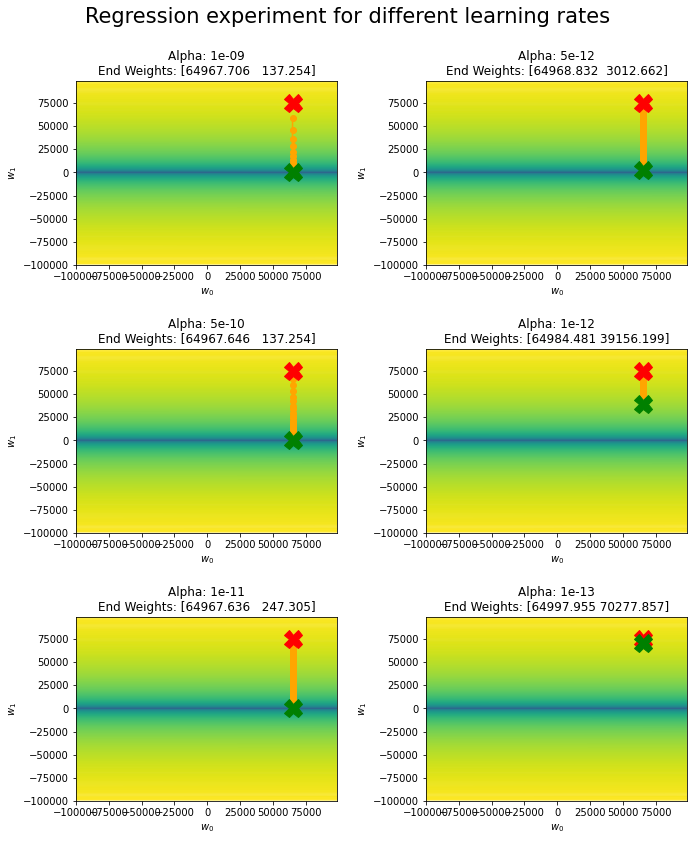

In [7]:
# TODO: Define alphas (learning rates) to test.
initial_weights = [65000, 75000]
tolerance = 1e-3
max_Iter = 3000
alpha = [1e-9, 5e-10, 1e-11, 5e-12, 1e-12, 1e-13]

# TODO: Repeat experiment for each alpha and observe the contour plot in each case. You may use subplots in Matplotlib for the plots.
figure, axs = plt.subplots(3, 2, figsize=(10, 12))
figure.suptitle('Regression experiment for different learning rates', fontsize=21)

step = 1000
max_value = 100000
w0 = np.arange(-max_value, max_value, step)
w1 = np.arange(-max_value, max_value, step)
X, Y = np.meshgrid(w0, w1)
J = J_house(np.array([X, Y]))
norm=colors.LogNorm()
# norm=colors.Normalize()

index = 0
for y in range(2):
    for x in range(3):

        weights, weights_history, iterations, house_losses = gradientDescent(J_house, gradient_J_house,
                                                                             initial_weights, alpha[index],
                                                                             tolerance, max_Iter)

        contour_plot = axs[x,y].contour(X, Y, norm(J), levels=512)

        axs[x,y].plot(weights_history[0,0], weights_history[0,1], marker='X', markersize=18, zorder=3, color='red')
        axs[x,y].plot(weights_history[1:-2,0], weights_history[1:-2,1], marker='o', zorder=2, color='orange')
        axs[x,y].plot(weights_history[-1,0], weights_history[-1,1], marker='X', markersize=18, zorder=3,
                      color='green')

        axs[x,y].set_title('Alpha: ' + str(alpha[index]) + '\nEnd Weights: ' + str(np.round(weights,3)), size=12)
        axs[x,y].set_xlabel('$w_{0}$')
        axs[x,y].set_ylabel('$w_{1}$')

        index += 1

plt.tight_layout(pad=2.0)
plt.show()

iii\. Determine the weights of the model using the closed form solution for $\boldsymbol{w}$:
\begin{align}
    \hat{\mathbf{w}} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^Ty
\end{align}
Above, $\mathbf{y} = [y^{(1)},..., y^{(n)}]^T$ and $\mathbf{X}$ is the data matrix whose rows are $x^{(i)}$. Is this the same point that you have found above using gradient descent?

In [8]:
# TODO: Compute the closed form solution
X = np.column_stack((np.ones((len(house_sizes), 1)), house_sizes))
weights = np.linalg.inv(np.matmul(X.T, X))
weights = np.matmul(weights, X.T)
weights = np.matmul(weights, house_prices)
print(np.round(weights, 3))

[71270.492   134.525]
